In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd
import plotly.graph_objects as go
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/drive.google.com/drive/folders/1paVzlTQFHpu1Of2xJkx3cFq1qfmo8qZ3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd 'drive/My Drive/Data Science 2 - Project'

[Errno 2] No such file or directory: 'drive/My Drive/Data Science 2 - Project'
/content/drive/My Drive/Data Science 2 - Project


In [ ]:
suicide = pd.read_csv("master.csv",header= 0)
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
#get some stats
suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
suicide.info()#years 1985-2016

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
#The column headings include spaces and upper case strings
#To clean this, remove the spaces and clean the columns
suicide.columns = suicide.columns.str.replace(" ","_")
suicide.columns = suicide.columns.str.lower()
suicide.columns = suicide.columns.str.strip("_")
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,hdi_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
#Check for any missing values in the data set
suicide.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k_pop     False
country-year          False
hdi_for_year           True
gdp_for_year_($)      False
gdp_per_capita_($)    False
generation            False
dtype: bool

In [ ]:
suicide.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k_pop     float64
country-year           object
hdi_for_year          float64
gdp_for_year_($)       object
gdp_per_capita_($)      int64
generation             object
dtype: object

In [ ]:
suicide['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
suicide['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [ ]:
Capitalist_Countries = ['United States', 'Germany', 'Japan', 'Turkey', 'United Kingdom', 'France', 'Italy', 'South Korea',
              'Spain', 'Canada', 'Australia', 'Netherlands', 'Belgium', 'Greece', 'Portugal',
              'Sweden', 'Austria', 'Switzerland', 'Israel', 'Singapore', 'Denmark', 'Finland', 'Norway', 'Ireland',
              'New Zeland', 'Cyprus', 'Luxembourg', 'Iceland']

Socialist_Countries = ['Russian Federation', 'Ukraine', 'Poland', 'Uzbekistan', 'Romania', 'Kazakhstan', 'Azerbaijan', 'Czech Republic',
               'Hungary', 'Belarus', 'Tajikistan', 'Serbia', 'Bulgaria', 'Slovakia', 'Croatia', 'Maldova', 'Georgia',
               'Bosnia And Herzegovina', 'Albania', 'Armenia', 'Lithuania', 'Latvia', 'Brazil', 'Chile', 'Argentina',
               'China', 'India', 'Bolivia', 'Romenia', 'Slovenia', 'Estonia',]

In [ ]:
#populate array
all_countries = []
for i in range(len(suicide)):

    if suicide['country'][i] in Capitalist_Countries:
        all_countries.append('1')
    elif suicide['country'][i] in Socialist_Countries:
        all_countries.append('2')
    else:
        all_countries.append('3')

#suicide['country_world'] = country_world

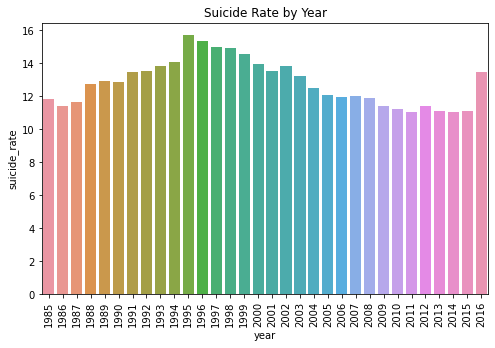

In [ ]:
suicide_plots = suicide.groupby('year') \
       .agg(suicide_rate=('suicides/100k_pop', 'mean')) \
       .reset_index()
suicide_plots.head()
#'''suicides_no_year = []
#pop_no_year = []
#for y in suicide['year'].unique():
#    suicides_no_year.append(sum(suicide[suicide['year'] == y]['suicides_no']))
#    pop_no_year.append(sum(suicide['year']==y['population']))
#
#n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides_no_year'])
#n_suicides_year['year'] = suicide['year'].unique()
#
#top_year = n_suicides_year.sort_values('suicides_no_year', ascending=False)['year']
#top_suicides = n_suicides_year.sort_values('suicides_no_year', ascending=False)['suicides_no_year']
#
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = suicide_plots.year, y = suicide_plots.suicide_rate).set_title('Suicide Rate by Year')
plt.show()
#'''


Based on the figure above, there is an increase in the number of suicides since 1990. However, this could have been a lack of data gathering due to data collection limitations before the 90s.

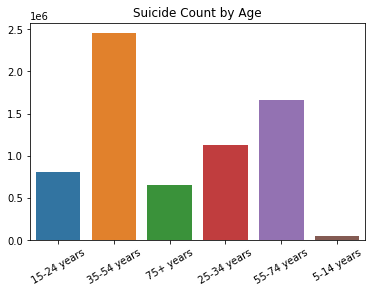

In [ ]:
suicides_no_age = []

for a in suicide['age'].unique():
    suicides_no_age.append(sum(suicide[suicide['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
ax = sns.barplot(x = suicide['age'].unique(), y = suicides_no_age)
ax.set_title('Suicide Count by Age')
plt.show()

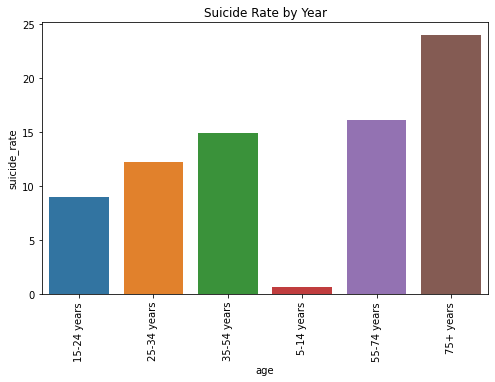

In [ ]:
suicide_plots = suicide.groupby('age').agg(suicide_rate=('suicides/100k_pop', 'mean')).reset_index()

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = suicide_plots.age, y = suicide_plots.suicide_rate).set_title('Suicide Rate by Year')
plt.show()

People aged '35 to 54' have the highest suicide count. '55 to 74' have the second highest suicide count.

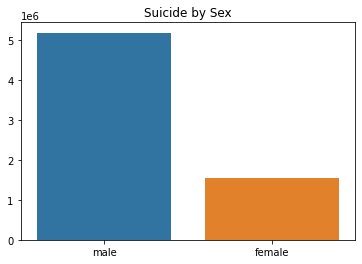

In [ ]:
suicides_no_sex = []

for s in suicide['sex'].unique():
    suicides_no_sex.append(sum(suicide[suicide['sex'] == s]['suicides_no']))

sns.barplot(x = suicide['sex'].unique(), y = suicides_no_sex).set_title('Suicide by Sex')
plt.show()

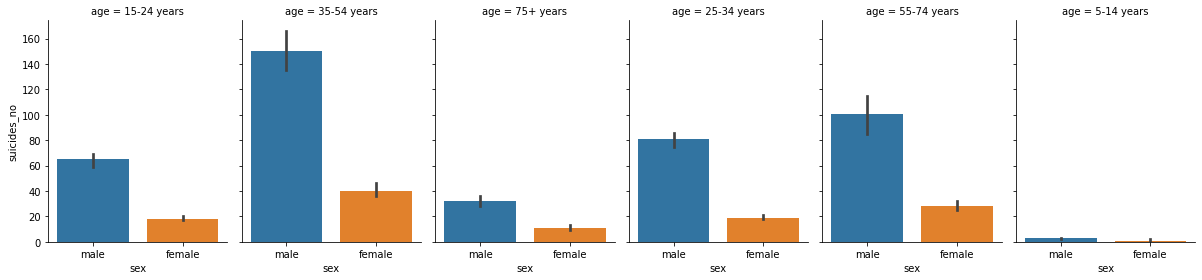

In [ ]:
ax = sns.catplot(x='sex', y='suicides_no',col='age', data=suicide, estimator=np.median,height=4, aspect=.7,kind='bar')

Based on the dataset, males are more likely to commit suicide than females across all age groups (overall, males have approximately 4 times higher suicide count than females).

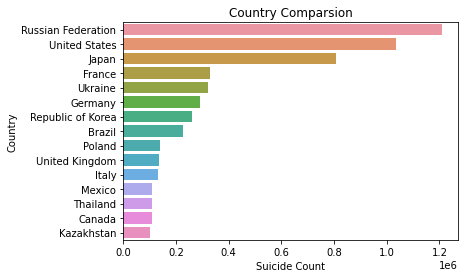

In [ ]:
suicides_no_country = []
for c in suicide['country'].unique():
    suicides_no_country.append(sum(suicide[suicide['country'] == c]['suicides_no']))

n_suicides_country = pd.DataFrame(suicides_no_country, columns=['suicides_no_country'])
n_suicides_country['country'] = suicide['country'].unique()

quant = 15
top_countries = n_suicides_country.sort_values('suicides_no_country', ascending=False)['country'][:quant]
top_suicides = n_suicides_country.sort_values('suicides_no_country', ascending=False)['suicides_no_country'][:quant]
ax = sns.barplot(x = top_suicides, y = top_countries)
ax.set_title('Country Comparsion')
ax.set_xlabel('Suicide Count')
ax.set_ylabel('Country')
plt.show()

Total suicide counts by country. The top three countries are Russia, USA, and Japan.

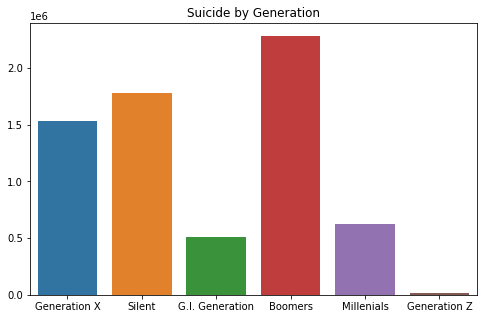

In [ ]:
suicides_no_gen=[]
for g in suicide['generation'].unique():
    suicides_no_gen.append(sum(suicide[suicide['generation'] == g]['suicides_no']))

plt.figure(figsize=(8,5))
sns.barplot(x = suicide['generation'].unique(), y = suicides_no_gen).set_title('Suicide by Generation')
plt.show()

The high suicide count for Boomers is also reflected on the plot for 'Suicide by Age' (ages of 52 to 70 as this dataset was compiled in 2016).

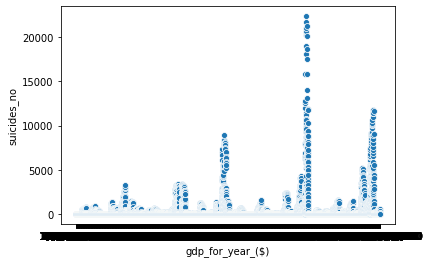

In [ ]:
sns.scatterplot(x = 'gdp_for_year_($)', y = 'suicides_no', data = suicide)

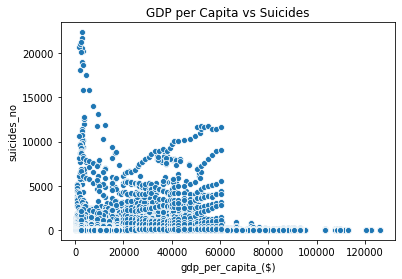

In [ ]:
sns.scatterplot(x = 'gdp_per_capita_($)', y = 'suicides_no', data = suicide).set_title('GDP per Capita vs Suicides')
plt.show()

GDP per Captia is a measure of a country's economic output that accounts for its number of people (GDP/Total Pop). Scatter plot of GDP per Capita vs Suicide count suggest that in general, lower standard of living or impoverished countries have a higher suicide rate. Though, from 20,000, the suicide count increases with GDP per Capita.

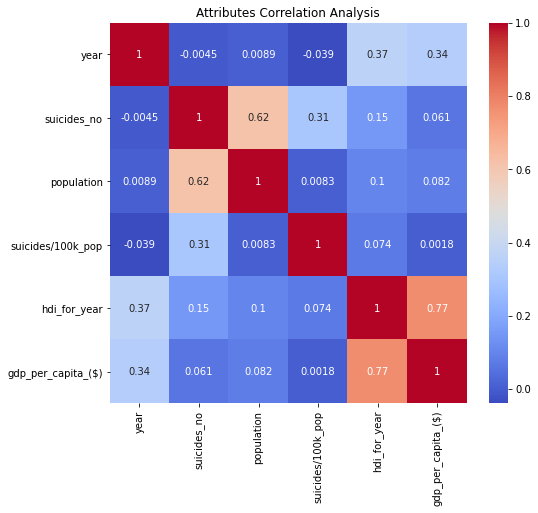

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(suicide.corr(), cmap = 'coolwarm', annot=True).set_title('Attributes Correlation Analysis')
plt.show()


Based on the heatmap generated above, it is observed that there is a high correlation between popluation and the number of suicides. A high correlation is also observed between GDP per Capita and HDI (Human development Index). This observation is reasonable as the HDI is a statistic composite index of life expectancy, education, and per capita income indicators.

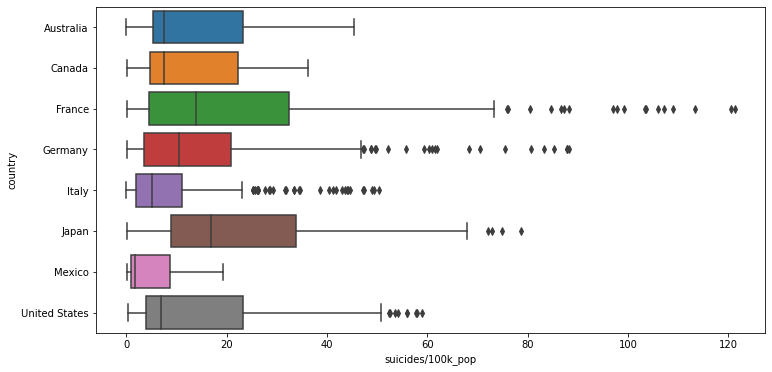

In [ ]:
countries = ['Canada', 'United States', 'Mexico', 'Italy', 'Sapin', 'Germany', 'Japan', 'Australia', 'France']
df_filtred = suicide[[suicide['country'][i] in countries for i in range(len(suicide))]]

plt.figure(figsize=(12,6))
sns.boxplot(x = 'suicides/100k_pop', y = 'country', data = df_filtred)

In [ ]:
suicide['gdp_for_year_($)'] = suicide['gdp_for_year_($)'].str.replace(',', '').astype(float)
suicide = suicide.groupby('country') \
       .agg(suicides_count=('suicides_no', 'size'), gdp_per_capita=('gdp_per_capita_($)', 'mean'), gdp=('gdp_for_year_($)', 'mean')) \
       .reset_index()
suicide.head()

,country,suicides_count,gdp_per_capita,gdp
0,Albania,264,1859.045455,5.211661e+09
1,Antigua and Barbuda,324,10448.185185,8.035452e+08
2,Argentina,372,7914.096774,2.742565e+11
3,Armenia,298,1873.919463,5.386592e+09
4,Aruba,168,24221.642857,2.196223e+09


In [ ]:
#To compare how the GDP and suicide rates are related, calculate the total number of suicides in a country
#Bin the GDP's in three categories [Low, Medium, High]
#The GDP's that fall in the lower 25% will be classified as low and similarly the top 25% will be classified as High. The remaining 50% will be Medium
suicide["gdp_per_capita"].describe()
#Based on the below, we get our bin values

count      101.000000
mean     15928.198677
std      16368.116583
min        720.730769
25%       4124.000000
50%       8829.037037
75%      25836.391304
max      68798.387097
Name: gdp_per_capita, dtype: float64

In [ ]:
bins = [0,4124,25836,69000]
bin_labels = ["Low","Medium","High"]
suicide["GDP_level"] = pd.cut(suicide["gdp_per_capita"],bins, right = False, labels = bin_labels)
suicide.head()

,country,suicides_count,gdp_per_capita,gdp,GDP_level
0,Albania,264,1859.045455,5.211661e+09,Low
1,Antigua and Barbuda,324,10448.185185,8.035452e+08,Medium
2,Argentina,372,7914.096774,2.742565e+11,Medium
3,Armenia,298,1873.919463,5.386592e+09,Low
4,Aruba,168,24221.642857,2.196223e+09,Medium


In [ ]:
suicide.round(2)

,country,suicides_count,gdp_per_capita,gdp,GDP_level
0,Albania,264,1859.05,5.211661e+09,Low
1,Antigua and Barbuda,324,10448.19,8.035452e+08,Medium
2,Argentina,372,7914.10,2.742565e+11,Medium
3,Armenia,298,1873.92,5.386592e+09,Low
4,Aruba,168,24221.64,2.196223e+09,Medium
...,...,...,...,...,...
96,United Arab Emirates,72,42162.00,2.532432e+11,High
97,United Kingdom,372,31908.35,1.816067e+12,High
98,United States,372,39269.61,1.051071e+13,High
99,Uruguay,336,7622.07,2.337827e+10,Medium


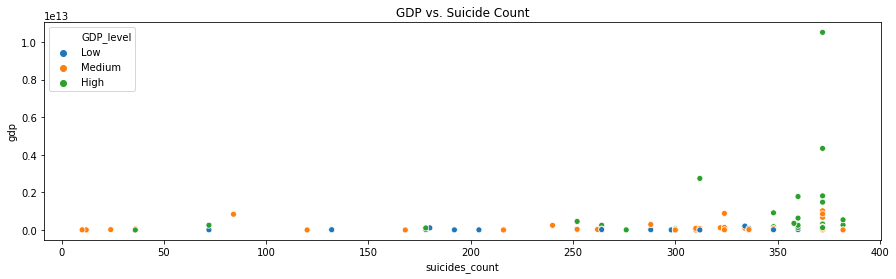

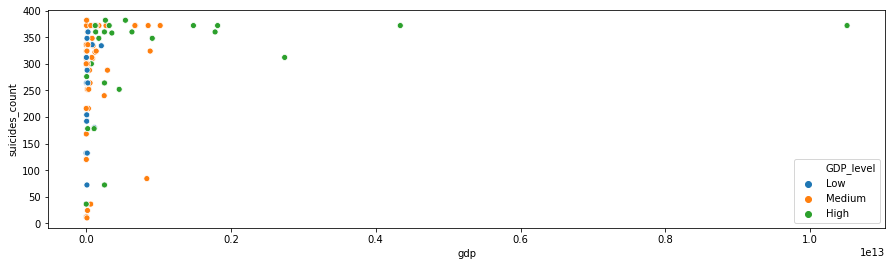

In [ ]:
plt.figure(figsize=(15,4))
sns.scatterplot(x = "suicides_count", y = "gdp", hue="GDP_level", data = suicide).set_title('GDP vs. Suicide Count')
plt.figure(figsize=(15,4))
sns.scatterplot(x = "gdp", y = "suicides_count", hue="GDP_level", data = suicide)

In [ ]:
def outliers_calc(df):
  mean, std = np.mean(df), np.std(df)
  cut = 3*std
  lower = mean - cut
  upper = mean + cut

  outliers_upper = [x for x in df if x > upper]
  outliers_lower = [x for x in df if x < lower]

  print("Identified low outliers: %d" %len(outliers_lower))
  print("Identified upper outliers: %d" %len(outliers_upper))
  return


In [ ]:
outliers_calc(suicide["gdp"])

Identified low outliers: 0
Identified upper outliers: 2


In [ ]:
#This adds country codes which are used by the choropleth map
df_temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df_temp.columns = ['country','gdp','code']
df_temp = df_temp.drop("gdp", axis=1)
suicide = pd.merge(suicide, df_temp, on='country')


In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = suicide['code'],
    z = suicide['suicides_count'],
    text = suicide['country'],
    colorscale = 'Rainbow',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Number of suicides',
))

fig.update_layout(
    title_text='Number of suicides 1985-2016',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016">\
            Kaggle</a>',
        showarrow = False
    )]
)

fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = suicide['code'],
    z = suicide['gdp_per_capita'],
    text = suicide['country'],
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP per capita',
))

fig.update_layout(
    title_text='GDP per capita USD ($)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016">\
            Kaggle</a>',
        showarrow = False
    )]
)

fig.show()

In [ ]:
suicide['Suicide_to_GDP_ratio']=suicide['suicides_count']/suicide['gdp']

In [ ]:
#suicide['Suicide_to_GDP_ratio']=suicide['Suicide_to_GDP_ratio']/suicide['Suicide_to_GDP_ratio'].mean()

outliers_calc(suicide["Suicide_to_GDP_ratio"])

Identified low outliers: 0
Identified upper outliers: 1


In [ ]:
#suicide
outlier=suicide[suicide.Suicide_to_GDP_ratio== suicide.Suicide_to_GDP_ratio.max()]
suicide=suicide[suicide.Suicide_to_GDP_ratio!= suicide.Suicide_to_GDP_ratio.max()]
suicide.reset_index(drop=True,inplace=True)

In [ ]:
outlier

,country,suicides_count,gdp_per_capita,gdp,GDP_level,code,Suicide_to_GDP_ratio
47,Kiribati,132,875.909091,5.928353e+07,Low,KIR,0.000002


In [ ]:
suicide

,country,suicides_count,gdp_per_capita,gdp,GDP_level,code,Suicide_to_GDP_ratio
0,Albania,264,1859.045455,5.211661e+09,Low,ALB,5.065563e-08
1,Antigua and Barbuda,324,10448.185185,8.035452e+08,Medium,ATG,4.032132e-07
2,Argentina,372,7914.096774,2.742565e+11,Medium,ARG,1.356394e-09
3,Armenia,298,1873.919463,5.386592e+09,Low,ARM,5.532255e-08
4,Aruba,168,24221.642857,2.196223e+09,Medium,ABW,7.649495e-08
...,...,...,...,...,...,...,...
91,United Arab Emirates,72,42162.000000,2.532432e+11,High,ARE,2.843117e-10
92,United Kingdom,372,31908.354839,1.816067e+12,High,GBR,2.048382e-10
93,United States,372,39269.612903,1.051071e+13,High,USA,3.539246e-11
94,Uruguay,336,7622.071429,2.337827e+10,Medium,URY,1.437232e-08


In [ ]:
#normalizing suicide to GDP ratio
from sklearn import preprocessing
x = suicide[['Suicide_to_GDP_ratio']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.head()

,0
0,0.094101
1,0.749491
2,0.002456
3,0.102777
4,0.142135


In [ ]:
suicide['Suicide_to_GDP_ratio_normalized']=df_normalized
suicide


,country,suicides_count,gdp_per_capita,gdp,GDP_level,code,Suicide_to_GDP_ratio,Suicide_to_GDP_ratio_normalized
0,Albania,264,1859.045455,5.211661e+09,Low,ALB,5.065563e-08,0.094101
1,Antigua and Barbuda,324,10448.185185,8.035452e+08,Medium,ATG,4.032132e-07,0.749491
2,Argentina,372,7914.096774,2.742565e+11,Medium,ARG,1.356394e-09,0.002456
3,Armenia,298,1873.919463,5.386592e+09,Low,ARM,5.532255e-08,0.102777
4,Aruba,168,24221.642857,2.196223e+09,Medium,ABW,7.649495e-08,0.142135
...,...,...,...,...,...,...,...,...
91,United Arab Emirates,72,42162.000000,2.532432e+11,High,ARE,2.843117e-10,0.000463
92,United Kingdom,372,31908.354839,1.816067e+12,High,GBR,2.048382e-10,0.000315
93,United States,372,39269.612903,1.051071e+13,High,USA,3.539246e-11,0.000000
94,Uruguay,336,7622.071429,2.337827e+10,Medium,URY,1.437232e-08,0.026652


In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = suicide['code'],
    z = suicide['Suicide_to_GDP_ratio_normalized']*100,
    text = suicide['country'],
    colorscale = 'Rainbow',
    autocolorscale=True,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Suicide to GDP normalized ratio',
))

fig.update_layout(
    title_text='Suicides/GDP',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016">\
            Kaggle</a>',
        showarrow = False
    )]
)

fig.show()

In [ ]:
statistical_parameters = suicide.groupby('GDP_level') \
       .agg(sample_mean=('Suicide_to_GDP_ratio_normalized', 'mean'), sample_std=('Suicide_to_GDP_ratio_normalized', 'std'), n=('Suicide_to_GDP_ratio_normalized', 'count')) \
       .reset_index()
statistical_parameters.head()


,GDP_level,sample_mean,sample_std,n
0,Low,0.095450,0.159166,24
1,Medium,0.102107,0.216965,47
2,High,0.007686,0.015808,25


In [ ]:
#two-tail test
#Ho:mu_low=mu_medium and/or mu_medium=mu_high
#H1:mu_low!=mu_medium and/or mu_medium!=mu_high
#two-sample t-test 0.05 significance level
#independent test
from scipy.stats import ttest_ind
import numpy as np


In [ ]:
low=suicide[suicide.GDP_level=='Low']['Suicide_to_GDP_ratio_normalized'].values
medium=suicide[suicide.GDP_level=='Medium']['Suicide_to_GDP_ratio_normalized'].values
high=suicide[suicide.GDP_level=='High']['Suicide_to_GDP_ratio_normalized'].values

In [ ]:
low,medium,high

(array([0.09410093, 0.10277653, 0.04943296, 0.01520514, 0.6532667 ,
        0.02458829, 0.0047211 , 0.22621063, 0.01739657, 0.03944638,
        0.08375766, 0.0630408 , 0.02645274, 0.49748303, 0.0476087 ,
        0.17516187, 0.0123773 , 0.05146922, 0.00287753, 0.01594461,
        0.00289755, 0.0558014 , 0.00737969, 0.02140246]),
 array([7.49490765e-01, 2.45568806e-03, 1.42135149e-01, 2.90554258e-02,
        1.80382110e-01, 2.33266537e-03, 6.10482056e-04, 1.18964630e-02,
        6.14999095e-03, 3.48195979e-02, 1.12141549e-02, 1.15515329e-02,
        4.83837992e-03, 3.23627035e-02, 3.84991653e-03, 1.00000000e+00,
        6.37134631e-03, 4.89385088e-03, 7.30510017e-03, 2.55097757e-02,
        1.75104004e-02, 3.49438206e-03, 1.45388656e-01, 1.30625119e-01,
        1.17724614e-01, 9.50706508e-04, 1.59644639e-03, 9.07088759e-02,
        7.75757333e-03, 1.00150947e-03, 2.75300664e-02, 1.75239339e-03,
        4.26981449e-03, 1.08724456e-02, 6.39592034e-03, 3.09733903e-01,
        7.42681607e-01

In [ ]:
ttest1,pval1 = ttest_ind(low,medium)
print("p-value",pval1)
if pval1 <0.05:
  print("we reject null hypothesis for low-medium")
else:
  print("we failed to reject the null hypothesis for low-medium")

p-value 0.8946201618221803
we failed to reject the null hypothesis for low-medium


In [ ]:
ttest2,pval2 = ttest_ind(medium,high)
print("p-value",pval2)
if pval2 <0.05:
  print("we reject null hypothesis for medium-high")
else:
  print("we accept null hypothesis for medium-high")

p-value 0.033741938016180834
we reject null hypothesis for medium-high


In [ ]:
ttest3,pval3 = ttest_ind(low,high)
print("p-value",pval3)
if pval3 <0.05:
  print("we reject null hypothesis for low-high")
else:
  print("we accept null hypothesis for low-high")

p-value 0.008563559517701009
we reject null hypothesis for low-high


While there isnt a statistical difference in suicide rate between low and medium GDP countries, there is an evident difference between high GDP countries and the other 2 categories. Richer countries probably have more money spent in mental health and suicide reduction policies. Kiribati was excluded from the analysis as it was an outlier with an extremely low GDP and high suicide however adding it into the analysis would not change the analysis.